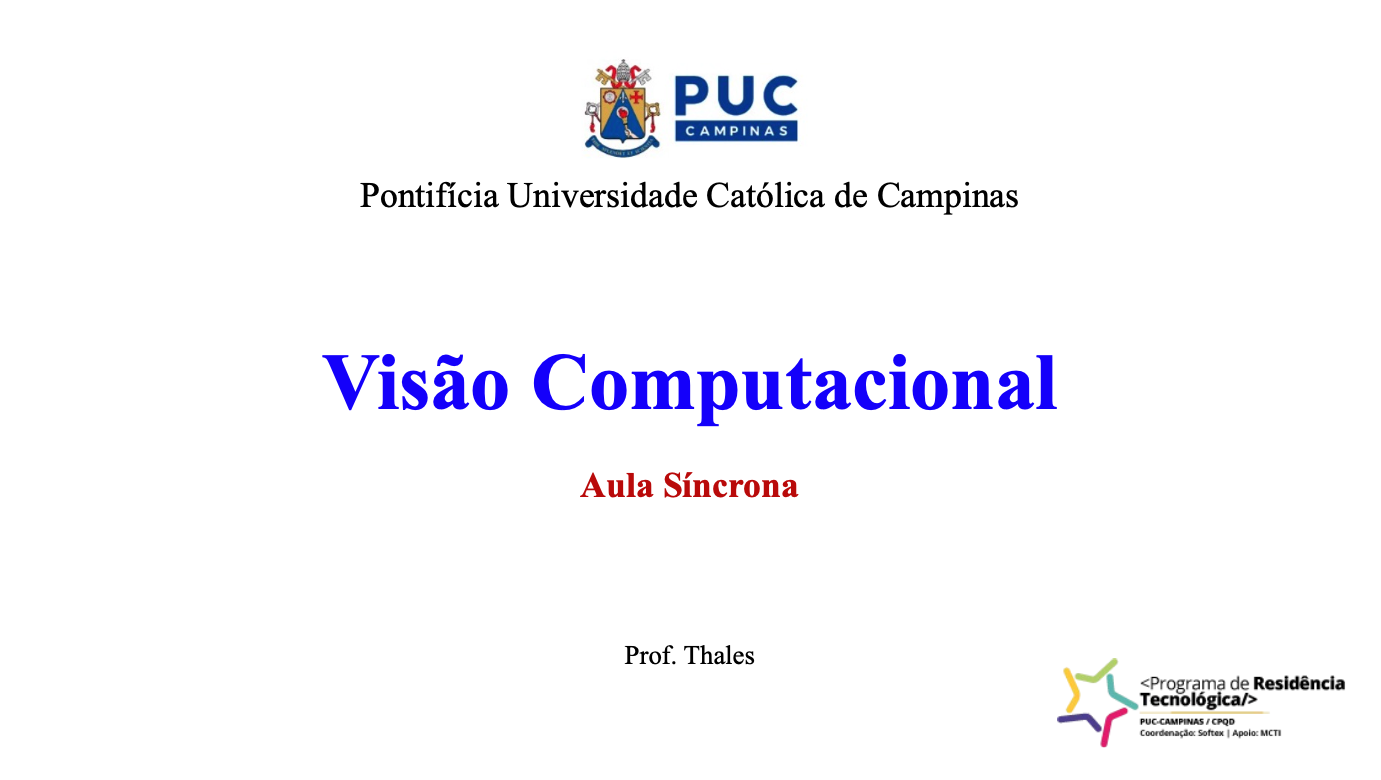



---



---

# **Summário:**

- **Tópico I: Processar dados e informações de redes neurais:**
  - Hyperparameter tuning.

- **Tópico II: Aplicar métodos de transferência de aprendizagem e modelos de deep learning:**
  - Fine tuning.

- **Tópico III: Processar dados e informações de redes neurais:**
  - Learning rate sheduling.

- **Tópico IV:** Conceitos de metric learning: contrastive loss e triplet-loss;

- **Tópico V:**

    - V-A: Prototipar soluções usando técnicas de visão computacional: aprender a visualizar o fluxo de dados necessário da solução, esquematizar uma solução e implementá-la (vimos ao longo do curso e vamos relembrar).

    - V-B: Modificar algoritmos de visão computacional existentes na literatura: como usar bibliotecas como Pytorch para implementar redes neurais;

---



---





---


# **Tópico I) Hiperparameter Tunning:**

O ajuste de hiperparâmetros (ou "hyperparameter tuning" em inglês) é um processo fundamental em machine learning para encontrar a combinação ideal de hiperparâmetros de um modelo de aprendizado de máquina a fim de obter o melhor desempenho possível em uma tarefa específica.


**O que são hiperparâmetros?**
Nomeamos por hiperparâmetros os parâmetros definidos antes de iniciar o treinamento, tal elemento têm um impacto significativo no desempenho do modelo.

**Por que ajustar hiperparâmetros é importante?**
A escolha adequada dos hiperparâmetros pode fazer a diferença entre um modelo que funciona bem e um modelo que não funciona tão bem. Diferentes combinações de hiperparâmetros podem afetar a capacidade do modelo de aprender a partir dos dados, sua capacidade de generalização e seu desempenho em tarefas específicas.



### **Grid Search e Random Search:**

Grid Search e Random Search são duas técnicas de ajuste de hiperparâmetros usadas em machine learning para encontrar a melhor combinação de hiperparâmetros de um modelo. Ambas as abordagens são usadas para automatizar o processo de seleção dos melhores hiperparâmetros, mas diferem na maneira como exploram o espaço de busca de hiperparâmetros.

- **Grid Search:**
Grid Search é uma técnica de ajuste de hiperparâmetros que explora todas as combinações possíveis de hiperparâmetros em um espaço de busca pré-definido.

- **Random Search:**
A busca aleatória é uma técnica de ajuste de hiperparâmetros que, como o nome sugere, explora aleatoriamente o espaço de busca de hiperparâmetros.

A imagem abaixo, exemplifica visualmente as possibilidades de busca em relação às referidas técnicas. Cada ponto vermelho é uma combinação possível e o ponto em verde é o resultado obtido ao final da busca.



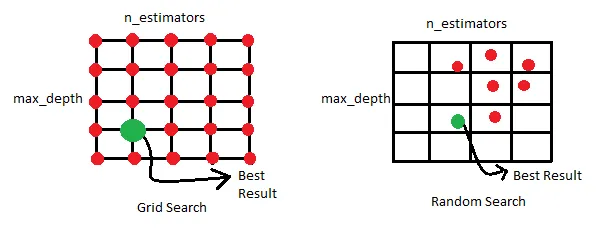

Seguem implementações envolvendo Grid Search e Random Search, observe os códigos abaixo:

## **Grid Search:**

### Exemplo inicial com k-NN:

In [ ]:
# Importações
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Gerar dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os valores possíveis para k que serão testados
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Criar o modelo k-NN
knn = KNeighborsClassifier()

# Realizar tuning de hiperparâmetros usando GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obter o melhor valor de k encontrado pelo GridSearch
best_k = grid_search.best_params_['n_neighbors']

# Treinar o modelo com o melhor valor de k
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

In [ ]:
# Calcular a acurácia do modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print(f"Melhor valor de k encontrado: {best_k}")
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

Melhor valor de k encontrado: 15
Acurácia do modelo no conjunto de teste: 0.795


### Exemplo empregando RNA para obtensão do número de neurônios:

In [ ]:
# Biblioteca atualizada para busca de hiperparâmetros
!pip install scikeras

In [ ]:
# Importações
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score

# Carregar e pré-processar os dados MNIST usando Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Defina uma função para criar o modelo Keras com a quantidade de neurônios na primeira camada intermediária
def create_model(neurons=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Teste diferentes quantidades de neurônios na primeira camada intermediária
neuron_values = [64, 128]
best_accuracy = 0
best_neurons = None

for neurons in neuron_values:
    model = create_model(neurons=neurons)
    model.fit(X_train, y_train, epochs=10, verbose=0)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_neurons = neurons

# Crie um novo modelo com o melhor número de neurônios encontrados
best_model = create_model(neurons=best_neurons)
best_model.fit(X_train, y_train, epochs=10, verbose=1)

# Avalie o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))

# Imprima o melhor número de neurônios e a acurácia do modelo
print(f"Melhor número de neurônios na primeira camada intermediária: {best_neurons}")
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")


313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2553 - accuracy: 0.9278
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0763 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0573 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0215 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
313/313 [======

### Exemplo empregando RNA para obtensão do número de neurônios e o número de camadas:


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Carregar e pré-processar os dados MNIST usando Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Defina a função para criar o modelo Keras com base no número de camadas
def create_model(num_layers=1, neurons=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
    ])

    for _ in range(num_layers):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Defina os hiperparâmetros para a pesquisa em grade (quantidade de camadas e neurônios)
param_grid = {
    'model__num_layers': [1, 2],  # Experimente diferentes quantidades de camadas
    'model__neurons': [64, 128]  # Experimente diferentes quantidades de neurônios
}

# Crie o modelo KerasClassifier com hiperparâmetros padrão
clf = KerasClassifier(model=create_model, verbose=0)

# Crie o objeto GridSearchCV com o modelo KerasClassifier
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Treine o modelo com a pesquisa em grade
grid_search.fit(X_train, y_train)

# Obtenha os melhores hiperparâmetros encontrados
best_num_layers = grid_search.best_params_['model__num_layers']
best_neurons = grid_search.best_params_['model__neurons']

# Crie um novo modelo com os melhores hiperparâmetros encontrados
best_model = create_model(num_layers=best_num_layers, neurons=best_neurons)

# Treine o modelo
best_model.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
# Avalie o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)

# Imprima os melhores hiperparâmetros e a acurácia do modelo
print(" ")
print(f"Melhores hiperparâmetros encontrados:")
print(f"Número de camadas intermediárias: {best_num_layers}")
print(f"Neurons na primeira camada intermediária: {best_neurons}")
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step
 
Melhores hiperparâmetros encontrados:
Número de camadas intermediárias: 2
Neurons na primeira camada intermediária: 128
Acurácia do modelo no conjunto de teste: 0.9786




---


## **Random Search:**

### Exemplo inicial com k-NN:

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Gerar dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os valores possíveis para k que serão testados
param_dist = {'n_neighbors': np.arange(1, 20)}

# Criar o modelo k-NN
knn = KNeighborsClassifier()

# Realizar tuning de hiperparâmetros usando RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Obter o melhor valor de k encontrado pelo RandomizedSearch
best_k = random_search.best_params_['n_neighbors']

# Treinar o modelo com o melhor valor de k
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Calcular a acurácia do modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print(f"Melhor valor de k encontrado: {best_k}")
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

Melhor valor de k encontrado: 15
Acurácia do modelo no conjunto de teste: 0.7950


### Exemplo com RNA:

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Carregar e pré-processar os dados MNIST usando Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Defina a função para criar o modelo Keras com base no número de camadas
def create_model(num_layers=1, neurons=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
    ])

    for _ in range(num_layers):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Defina os hiperparâmetros para a pesquisa aleatória (quantidade de camadas e neurônios)
param_dist = {
    'model__num_layers': [1, 2],  # Experimente diferentes quantidades de camadas
    'model__neurons': [64, 128]  # Experimente diferentes quantidades de neurônios
}

# Crie o modelo KerasClassifier com hiperparâmetros padrão
clf = KerasClassifier(model=create_model, verbose=0)

# Crie o objeto RandomizedSearchCV com o modelo KerasClassifier
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=3, cv=2, scoring='accuracy', n_jobs=-1)

# Treine o modelo com a pesquisa aleatória
random_search.fit(X_train, y_train)

# Obtenha os melhores hiperparâmetros encontrados
best_num_layers = random_search.best_params_['model__num_layers']
best_neurons = random_search.best_params_['model__neurons']

# Crie um novo modelo com os melhores hiperparâmetros encontrados
best_model = create_model(num_layers=best_num_layers, neurons=best_neurons)

# Treine o modelo
best_model.fit(X_train, y_train, epochs=10, verbose=1)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2318 - accuracy: 0.9318
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0987 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0699 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0524 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 10/10
1875

In [ ]:
# Avalie o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)

# Imprima os melhores hiperparâmetros e a acurácia do modelo
print(" ")
print(f"Melhores hiperparâmetros encontrados:")
print(f"Número de camadas intermediárias: {best_num_layers}")
print(f"Neurons na primeira camada intermediária: {best_neurons}")
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step
 
Melhores hiperparâmetros encontrados:
Número de camadas intermediárias: 2
Neurons na primeira camada intermediária: 128
Acurácia do modelo no conjunto de teste: 0.9793




---


# **Tópico II) Fine Tunning:**

 O Fine-Tuning (ou ajuste fino) em machine learning refere-se ao processo de ajustar um modelo de aprendizado de máquina a partir de um treinamento prévio. Observe a implementação abaixo:

- Inicialmente, descobrimos a região de interesse para o hiperparâmetro C (1, 10 e 100).

In [ ]:
# Importações
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST via Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Redimensionar as imagens para um vetor unidimensional
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Definir a grade de hiperparâmetros para pesquisa em grade
param_grid = {'C': [1, 10, 100]}

# Criar o classificador SVM
svm_classifier = SVC(kernel='linear')

# Criar o objeto de pesquisa em grade com validação cruzada
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# Realizar a pesquisa em grade no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor modelo
best_svm = grid_search.best_estimator_

# Fazer previsões no conjunto de validação
y_val_pred = best_svm.predict(X_val)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Fazer previsões no conjunto de teste
y_test_pred = best_svm.predict(X_test)

# Calcular a acurácia no conjunto de teste
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Acurácia do modelo SVM com melhor C (conjunto de teste):", accuracy_test)

Melhores hiperparâmetros: {'C': 1}
Acurácia do modelo SVM com melhor C (conjunto de teste): 0.9351


- Após a descoberta de C=1, vamos refinar a busca. Assim, vamos explorar um ajuste fino entre 0.1, 1, e 2. Observe o código abaixo:

In [ ]:
# Importações
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados MNIST via Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Redimensionar as imagens para um vetor unidimensional
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Definir a grade de hiperparâmetros para pesquisa em grade
param_grid = {'C': [0.1, 1, 2]}

# Criar o classificador SVM
svm_classifier = SVC(kernel='linear')

# Criar o objeto de pesquisa em grade com validação cruzada
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# Realizar a pesquisa em grade no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor modelo
best_svm = grid_search.best_estimator_

# Fazer previsões no conjunto de validação
y_val_pred = best_svm.predict(X_val)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Fazer previsões no conjunto de teste
y_test_pred = best_svm.predict(X_test)

# Calcular a acurácia no conjunto de teste
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Acurácia do modelo SVM com melhor C (conjunto de teste):", accuracy_test)

Melhores hiperparâmetros: {'C': 0.1}
Acurácia do modelo SVM com melhor C (conjunto de teste): 0.9439


- Observe o exemplo abaixo para uma RNA:

In [ ]:
# Importações
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Carregar o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
X_train, X_test = X_train / 255.0, X_test / 255.0

# Defina o modelo base com camadas convolucionais
base_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo base
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo base nos dados MNIST
base_model.fit(X_train, y_train, epochs=5, verbose=2)
print(" ")

# Fine-tuning: ajuste apenas as camadas finais para aprimorar o desempenho
fine_tune_model = Sequential([
    base_model.layers[0],  # Camada de entrada
    base_model.layers[1],  # Primeira camada oculta
    base_model.layers[2],  # Segunda camada oculta
    Dense(10, activation='softmax')  # Camada de saída (ajustada)
])

# Compilar o modelo de fine-tuning
fine_tune_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Refinando o treinamento do modelo
print(" ")
# Treinar o modelo de fine-tuning com um número reduzido de épocas
fine_tune_model.fit(X_train, y_train, epochs=2, verbose=2)

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = base_model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
print(" ")
# Avaliar o modelo de fine-tuning no conjunto de teste
test_loss, test_acc = fine_tune_model.evaluate(X_test, y_test)
print("Test accuracy after fine-tuning:", test_acc)

Epoch 1/5
1875/1875 - 6s - loss: 0.2408 - accuracy: 0.9284 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.1014 - accuracy: 0.9692 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0719 - accuracy: 0.9778 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.0541 - accuracy: 0.9823 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 6s - loss: 0.0428 - accuracy: 0.9858 - 6s/epoch - 3ms/step
 
 
Epoch 1/2
1875/1875 - 7s - loss: 0.5655 - accuracy: 0.8487 - 7s/epoch - 4ms/step
Epoch 2/2
1875/1875 - 5s - loss: 0.0991 - accuracy: 0.9722 - 5s/epoch - 3ms/step
313/313 [==============================] - 2s 6ms/step - loss: 1.5491 - accuracy: 0.7043
Test accuracy: 0.7042999863624573
 
313/313 [==============================] - 2s 4ms/step - loss: 0.0986 - accuracy: 0.9707
Test accuracy after fine-tuning: 0.9707000255584717




---

# **Tópico III) Learning Rate Sheduling:**

Learning Rate Scheduling é uma técnica em treinamento de modelos de machine learning que envolve a alteração da taxa de aprendizado durante o processo de treinamento. Observe o código abaixo:

In [ ]:
# Importações
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler

# Estruturação do Learning Rate Sheduling via LearningRateScheduler:
def lr_lambda(epoch):
    base_lr = 0.01
    factor = 0.1
    lrate = base_lr / (1 + factor * epoch)
    return lrate

lrate = LearningRateScheduler(lr_lambda)

# Carregar e pré-processar os dados MNIST usando Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Estrutura do modelo
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(30, activation=tf.nn.relu),
 tf.keras.layers.Dense(30, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treine o modelo com o callback LearningRateScheduler (aplicação do LearningRateScheduler)
model.fit(X_train, y_train, callbacks=[lrate], epochs=10, verbose=1)

# Avalie o modelo
test_loss, test_acc = model.evaluate(X_test, y_test);
print(" ")
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3161 - accuracy: 0.9053 - lr: 0.0100
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2102 - accuracy: 0.9387 - lr: 0.0091
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1844 - accuracy: 0.9473 - lr: 0.0083
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1682 - accuracy: 0.9513 - lr: 0.0077
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1540 - accuracy: 0.9558 - lr: 0.0071
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1454 - accuracy: 0.9581 - lr: 0.0067
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9615 - lr: 0.0063
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1263 - accuracy: 0.9636 - lr: 0.0059
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.11



---

# **Tópico IV: Conceitos de metric learning: contrastive loss e triplet-loss.**

Conforme discutodo em sala de aula, podemos aplicar contrastive loss e triplet-loss em determinados probelams. Observe as implementações abaixo, para ambas as estratégias:

## Rede Base:

In [ ]:
# Clonando o repositório
!git clone https://github.com/adambielski/siamese-triplet

Cloning into 'siamese-triplet'...
remote: Enumerating objects: 146, done.
remote: Total 146 (delta 0), reused 0 (delta 0), pack-reused 146
Receiving objects: 100% (146/146), 12.61 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [ ]:
# Acessando o diretório siamese-triplet
%cd /content/siamese-triplet
from trainer import fit

/content/siamese-triplet


In [ ]:
# Carrega a extensão autoreload para recarregar automaticamente módulos alterados.
%load_ext autoreload
# Define o nível de recarregamento automático como 2.
%autoreload 2

# Importa a classe MNIST do conjunto de dados torchvision.datasets.
from torchvision.datasets import MNIST
# Importa transformações da biblioteca torchvision.
from torchvision import transforms

# Define as médias e desvios padrão para normalização.
mean, std = 0.1307, 0.3081

# Cria o conjunto de treinamento MNIST com transformações.
train_dataset = MNIST('../data/MNIST', train=True, download=True,
                      transform=transforms.Compose([
                          transforms.ToTensor(),
                          transforms.Normalize((mean,), (std,))
                      ]))
# Cria o conjunto de teste MNIST com transformações.
test_dataset = MNIST('../data/MNIST', train=False, download=True,
                     transform=transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((mean,), (std,))
                     ]))

# Define o número de classes.
n_classes = 10

# Importa as bibliotecas necessárias do PyTorch.
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable

# Importa a função "fit" do módulo "trainer".
from trainer import fit

# Importa a biblioteca NumPy.
import numpy as np

# Verifica se o uso da GPU (CUDA) está disponível.
cuda = torch.cuda.is_available()

# Importa as bibliotecas necessárias para plotagem.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Define os rótulos das classes MNIST e as cores para plotagem.
mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']

# Define uma função para plotar incorporações (embeddings).
def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        inds = np.where(targets == i)[0]
        plt.scatter(embeddings[inds, 0], embeddings[inds, 1], alpha=0.5, color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(mnist_classes)

# Define uma função para extrair incorporações (embeddings) de um DataLoader usando um modelo.
def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 2))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

100%|██████████| 9912422/9912422 [00:00<00:00, 192146556.88it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22642185.76it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 74612329.10it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19741480.59it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
# Para limpar a visualização das saídas após rodar as células
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Construindo a Rede Base:

In [ ]:
# Define o tamanho do lote (batch size) para treinamento.
batch_size = 256

# Cria um dicionário de argumentos para configuração do DataLoader com base na disponibilidade de CUDA.
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

# Cria um DataLoader para o conjunto de treinamento com o tamanho de lote especificado, embaralhando os dados e aplicando as configurações definidas em "kwargs".
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

# Cria um DataLoader para o conjunto de teste com o tamanho de lote especificado, sem embaralhar os dados e aplicando as configurações definidas em "kwargs".
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Importa as redes neurais do módulo "networks" e a métrica de acurácia acumulada do módulo "metrics".
from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric

# Cria uma rede de incorporação (embedding) neural.
embedding_net = EmbeddingNet()

# Cria um modelo de classificação usando a rede de incorporação criada e especifica o número de classes.
model = ClassificationNet(embedding_net, n_classes=n_classes)

# Move o modelo para a GPU (CUDA) se estiver disponível.
if cuda:
    model.cuda()

# Define a função de perda como a perda logarítmica negativa (NLLLoss).
loss_fn = torch.nn.NLLLoss()

# Define a taxa de aprendizado (learning rate).
lr = 1e-2

# Define o otimizador como o otimizador Adam, que otimizará os parâmetros do modelo com a taxa de aprendizado definida.
optimizer = optim.Adam(model.parameters(), lr=lr)

# Define um agendador de taxa de aprendizado que ajustará a taxa de aprendizado durante o treinamento.
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)

# Define o número de épocas de treinamento.
n_epochs = 20

# Define o intervalo de registro (em batches) para monitorar o treinamento.
log_interval = 50

In [ ]:
# Fit do modelo aos dados
fit(train_loader, test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval, metrics=[AccumulatedAccuracyMetric()])

# Argumentos da função "fit":
# - train_loader: DataLoader para o conjunto de treinamento.
# - test_loader: DataLoader para o conjunto de teste.
# - model: O modelo neural a ser treinado.
# - loss_fn: A função de perda a ser usada para calcular a perda durante o treinamento.
# - optimizer: O otimizador responsável por ajustar os pesos do modelo durante o treinamento.
# - scheduler: O agendador de taxa de aprendizado que controla a taxa de aprendizado durante o treinamento.
# - n_epochs: O número de épocas de treinamento (quantas vezes todo o conjunto de treinamento será percorrido).
# - cuda: Um indicador booleano que indica se a GPU (CUDA) está disponível e se o treinamento deve ser realizado nela.
# - log_interval: O intervalo em batches para registrar informações sobre o treinamento (por exemplo, perdas, acurácia, etc.).
# - metrics: Uma lista de métricas a serem calculadas durante o treinamento, neste caso, apenas a métrica de acurácia acumulada é especificada (AccumulatedAccuracyMetric).

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Train: [0/60000 (0%)]	Loss: 2.334605	Accuracy: 11.71875
Train: [12800/60000 (21%)]	Loss: 2.544922	Accuracy: 9.75796568627451
Train: [25600/60000 (43%)]	Loss: 1.976512	Accuracy: 19.26825495049505
Train: [38400/60000 (64%)]	Loss: 0.889930	Accuracy: 35.97112996688742
Train: [51200/60000 (85%)]	Loss: 0.498929	Accuracy: 49.12157960199005
Epoch: 1/20. Train set: Average loss: 1.3144	Accuracy: 55.425
Epoch: 1/20. Validation set: Average loss: 0.2526	Accuracy: 94.24
Train: [0/60000 (0%)]	Loss: 0.282945	Accuracy: 94.140625
Train: [12800/60000 (21%)]	Loss: 0.280888	Accuracy: 94.17126225490196
Train: [25600/60000 (43%)]	Loss: 0.225370	Accuracy: 94.81358292079207
Train: [38400/60000 (64%)]	Loss: 0.193395	Accuracy: 95.17798013245033
Train: [51200/60000 (85%)]	Loss: 0.176702	Accuracy: 95.46602922885572
Epoch: 2/20. Train set: Average loss: 0.2145	Accuracy: 95.58666666666667
Epoch: 2/20. Validation set: Average loss: 0.2137	Accuracy: 96.47
Train: [0/60000 (0%)]	Loss: 0.297617	Accuracy: 93.359375
Trai

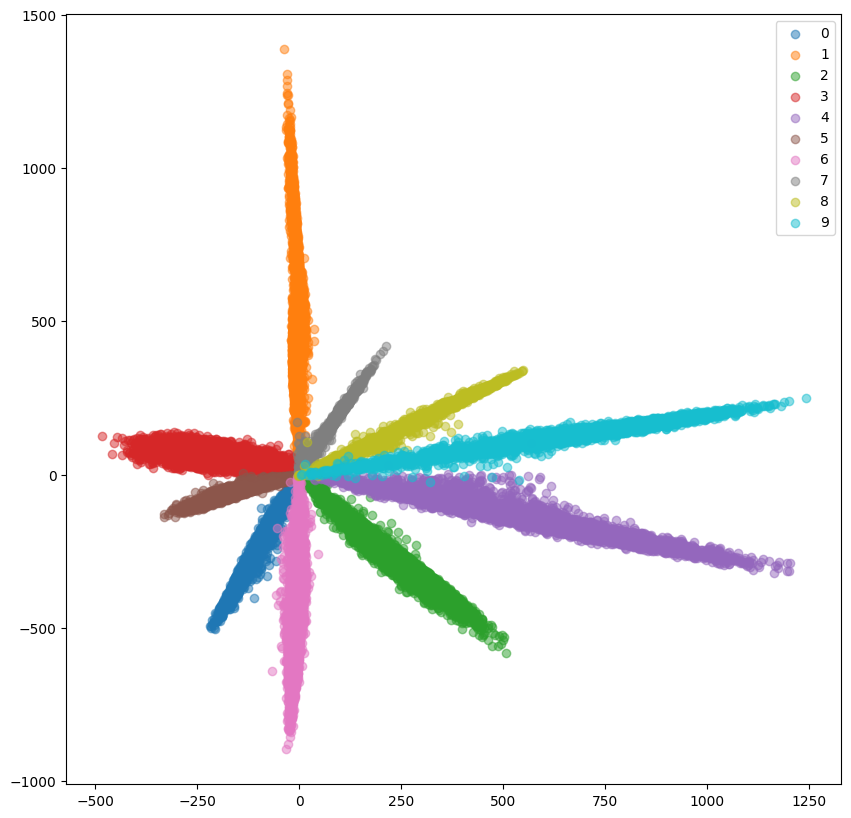

In [ ]:
# Chamada da função "extract_embeddings":
# - train_loader: DataLoader para o conjunto de treinamento.
# - model: O modelo neural do qual as incorporações (embeddings) serão extraídas.
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)

# Plotando o resultado
# Chamada da função "plot_embeddings":
# - train_embeddings_baseline: As incorporações (embeddings) extraídas do conjunto de treinamento.
# - train_labels_baseline: Os rótulos correspondentes às incorporações extraídas do conjunto de treinamento.
plot_embeddings(train_embeddings_baseline, train_labels_baseline)

## **Contrastive Loss:**

In [ ]:
# Importa a classe SiameseMNIST do módulo "datasets".
from datasets import SiameseMNIST

# Cria um conjunto de dados Siamese baseado no conjunto de treinamento.
siamese_train_dataset = SiameseMNIST(train_dataset)

# Cria um conjunto de dados Siamese baseado no conjunto de teste.
siamese_test_dataset = SiameseMNIST(test_dataset)

# Define o tamanho do lote (batch size) para o treinamento do modelo Siamese.
batch_size = 128

# Cria um dicionário de argumentos para configuração do DataLoader com base na disponibilidade de CUDA.
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

# Cria um DataLoader para o conjunto de treinamento Siamese com o tamanho de lote especificado, embaralhando os dados e aplicando as configurações definidas em "kwargs".
siamese_train_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

# Cria um DataLoader para o conjunto de teste Siamese com o tamanho de lote especificado, sem embaralhar os dados e aplicando as configurações definidas em "kwargs".
siamese_test_loader = torch.utils.data.DataLoader(siamese_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Importa as redes neurais do módulo "networks", incluindo a EmbeddingNet e a SiameseNet.
from networks import EmbeddingNet, SiameseNet

# Importa a função de perda ContrastiveLoss do módulo "losses".
from losses import ContrastiveLoss

# Define a margem utilizada na perda contrastiva.
margin = 1.

# Cria uma rede de incorporação (embedding) neural.
embedding_net = EmbeddingNet()

# Cria um modelo SiameseNet usando a rede de incorporação criada.
model = SiameseNet(embedding_net)

# Move o modelo para a GPU (CUDA) se estiver disponível.
if cuda:
    model.cuda()

# Define a função de perda como a perda contrastiva com a margem especificada.
loss_fn = ContrastiveLoss(margin)

# Define a taxa de aprendizado (learning rate).
lr = 1e-3

# Define o otimizador como o otimizador Adam, que otimizará os parâmetros do modelo com a taxa de aprendizado definida.
optimizer = optim.Adam(model.parameters(), lr=lr)

# Define um agendador de taxa de aprendizado que ajustará a taxa de aprendizado durante o treinamento.
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)

# Define o número de épocas de treinamento.
n_epochs = 20

# Define o intervalo de registro (em batches) para monitorar o treinamento.
log_interval = 100

In [ ]:
# Fit do modelo aos dados
fit(siamese_train_loader, siamese_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

Train: [0/60000 (0%)]	Loss: 0.226519
Train: [12800/60000 (21%)]	Loss: 0.067106
Train: [25600/60000 (43%)]	Loss: 0.041597
Train: [38400/60000 (64%)]	Loss: 0.033048
Train: [51200/60000 (85%)]	Loss: 0.025291
Epoch: 1/20. Train set: Average loss: 0.0394
Epoch: 1/20. Validation set: Average loss: 0.0225
Train: [0/60000 (0%)]	Loss: 0.016494
Train: [12800/60000 (21%)]	Loss: 0.017878
Train: [25600/60000 (43%)]	Loss: 0.016248
Train: [38400/60000 (64%)]	Loss: 0.015618
Train: [51200/60000 (85%)]	Loss: 0.013612
Epoch: 2/20. Train set: Average loss: 0.0154
Epoch: 2/20. Validation set: Average loss: 0.0141
Train: [0/60000 (0%)]	Loss: 0.007868
Train: [12800/60000 (21%)]	Loss: 0.010047
Train: [25600/60000 (43%)]	Loss: 0.009396
Train: [38400/60000 (64%)]	Loss: 0.009526
Train: [51200/60000 (85%)]	Loss: 0.008815
Epoch: 3/20. Train set: Average loss: 0.0094
Epoch: 3/20. Validation set: Average loss: 0.0103
Train: [0/60000 (0%)]	Loss: 0.004065
Train: [12800/60000 (21%)]	Loss: 0.006912
Train: [25600/60000 (

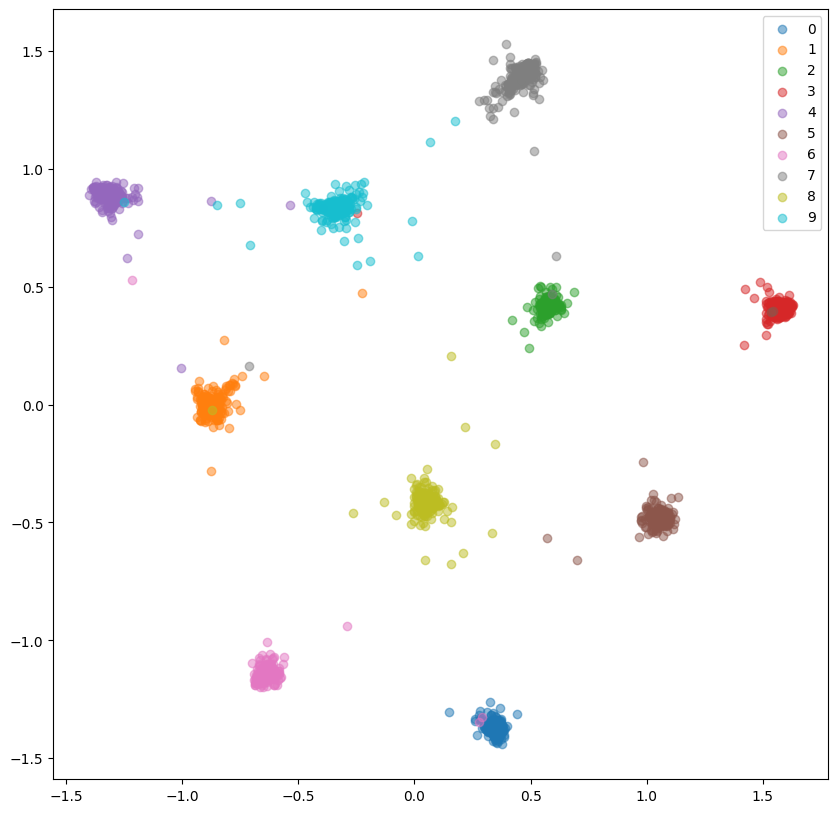

In [ ]:
# Chamada da função "extract_embeddings" para o conjunto de treinamento:
# - train_loader: DataLoader para o conjunto de treinamento.
# - model: O modelo neural do qual as incorporações (embeddings) serão extraídas.
train_embeddings_cl, train_labels_cl = extract_embeddings(train_loader, model)

# Chamada da função "plot_embeddings" para visualizar as incorporações extraídas:
# - train_embeddings_cl: As incorporações (embeddings) extraídas do conjunto de treinamento.
# - train_labels_cl: Os rótulos correspondentes às incorporações extraídas do conjunto de treinamento.
plot_embeddings(train_embeddings_cl, train_labels_cl)

## **Triplet Loss:**

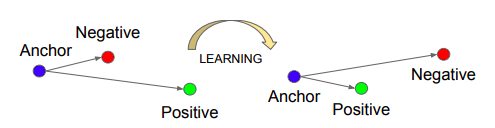

In [ ]:
# Importa a classe TripletMNIST do módulo "datasets".
from datasets import TripletMNIST

# Cria um conjunto de dados TripletMNIST baseado no conjunto de treinamento.
triplet_train_dataset = TripletMNIST(train_dataset)

# Cria um conjunto de dados TripletMNIST baseado no conjunto de teste.
triplet_test_dataset = TripletMNIST(test_dataset)

# Define o tamanho do lote (batch size) para o treinamento do modelo Triplet.
batch_size = 128

# Cria um dicionário de argumentos para configuração do DataLoader com base na disponibilidade de CUDA.
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

# Cria um DataLoader para o conjunto de treinamento Triplet com o tamanho de lote especificado, embaralhando os dados e aplicando as configurações definidas em "kwargs".
triplet_train_loader = torch.utils.data.DataLoader(triplet_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

# Cria um DataLoader para o conjunto de teste Triplet com o tamanho de lote especificado, sem embaralhar os dados e aplicando as configurações definidas em "kwargs".
triplet_test_loader = torch.utils.data.DataLoader(triplet_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Importa as redes neurais do módulo "networks", incluindo a EmbeddingNet e a TripletNet.
from networks import EmbeddingNet, TripletNet

# Importa a função de perda TripletLoss do módulo "losses".
from losses import TripletLoss

# Define a margem utilizada na perda triplet.
margin = 1.

# Cria uma rede de incorporação (embedding) neural.
embedding_net = EmbeddingNet()

# Cria um modelo TripletNet usando a rede de incorporação criada.
model = TripletNet(embedding_net)

# Move o modelo para a GPU (CUDA) se estiver disponível.
if cuda:
    model.cuda()

# Define a função de perda como a perda triplet com a margem especificada.
loss_fn = TripletLoss(margin)

# Define a taxa de aprendizado (learning rate).
lr = 1e-3

# Define o otimizador como o otimizador Adam, que otimizará os parâmetros do modelo com a taxa de aprendizado definida.
optimizer = optim.Adam(model.parameters(), lr=lr)

# Define um agendador de taxa de aprendizado que ajustará a taxa de aprendizado durante o treinamento.
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)

# Define o número de épocas de treinamento.
n_epochs = 20

# Define o intervalo de registro (em batches) para monitorar o treinamento.
log_interval = 100

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
# Fit do modelo aos dados:
fit(triplet_train_loader, triplet_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

Train: [0/60000 (0%)]	Loss: 0.999695
Train: [12800/60000 (21%)]	Loss: 0.314639
Train: [25600/60000 (43%)]	Loss: 0.151235
Train: [38400/60000 (64%)]	Loss: 0.095154
Train: [51200/60000 (85%)]	Loss: 0.082092
Epoch: 1/20. Train set: Average loss: 0.1485
Epoch: 1/20. Validation set: Average loss: 0.0545
Train: [0/60000 (0%)]	Loss: 0.056262
Train: [12800/60000 (21%)]	Loss: 0.051851
Train: [25600/60000 (43%)]	Loss: 0.048757
Train: [38400/60000 (64%)]	Loss: 0.045445
Train: [51200/60000 (85%)]	Loss: 0.051064
Epoch: 2/20. Train set: Average loss: 0.0477
Epoch: 2/20. Validation set: Average loss: 0.0400
Train: [0/60000 (0%)]	Loss: 0.024266
Train: [12800/60000 (21%)]	Loss: 0.033157
Train: [25600/60000 (43%)]	Loss: 0.034378
Train: [38400/60000 (64%)]	Loss: 0.030553
Train: [51200/60000 (85%)]	Loss: 0.028481
Epoch: 3/20. Train set: Average loss: 0.0313
Epoch: 3/20. Validation set: Average loss: 0.0366
Train: [0/60000 (0%)]	Loss: 0.017790
Train: [12800/60000 (21%)]	Loss: 0.026882
Train: [25600/60000 (

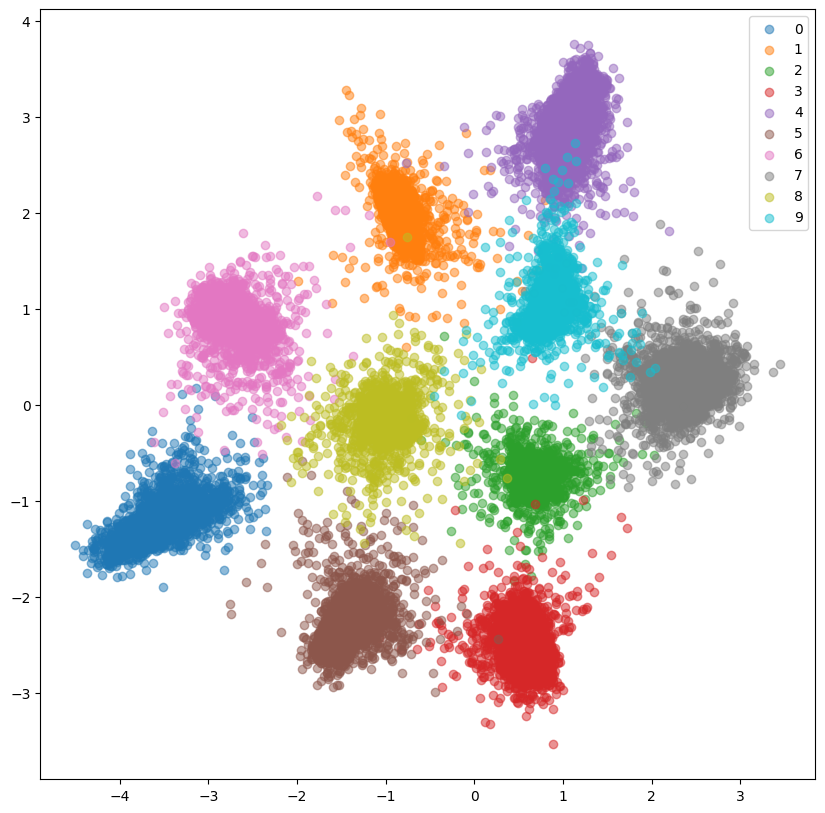

In [ ]:
# Chamada da função "extract_embeddings" para o conjunto de treinamento:
# - train_loader: DataLoader para o conjunto de treinamento.
# - model: O modelo neural do qual as incorporações (embeddings) serão extraídas.
train_embeddings_tl, train_labels_tl = extract_embeddings(train_loader, model)

# Chamada da função "plot_embeddings" para visualizar as incorporações extraídas:
# - train_embeddings_tl: As incorporações (embeddings) extraídas do conjunto de treinamento.
# - train_labels_tl: Os rótulos correspondentes às incorporações extraídas do conjunto de treinamento.
plot_embeddings(train_embeddings_tl, train_labels_tl)




---



# **Tópico V:**

## **V-A:** Prototipar soluções usando técnicas de visão computacional: aprender a visualizar o fluxo de dados necessário da solução, esquematizar uma solução e implementá-la (vimos ao longo do curso e vamos relembrar).

---

## **Visualizando o fluxo necessário da solução:**

### **1) Compreensão do Problema:**

- Primeiro, é crucial entender completamente o problema que deseja resolver com técnicas de visão computacional. Isso envolve identificar os requisitos, os objetivos e os dados disponíveis.

### **2) Coleta de Dados:**

- Reúna os dados necessários para treinar e avaliar seu modelo de visão computacional. Isso pode incluir aquisição de imagens, vídeos ou outros tipos de dados visuais. Em nossas aulas empregamos base de dados públicas disponíveis na literatura.

### **2) Pré-processamento de Dados:**

- Pré-processe os dados, o que pode envolver tarefas como redimensionamento, normalização, correção de cores, remoção de ruído e outras transformações para preparar os dados para a modelagem.

### **3) Escolha de Algoritmos e Modelos:**

- Escolha algoritmos e modelos apropriados para o seu problema de visão computacional. Isso pode incluir o uso de redes neurais convolucionais (CNNs), algoritmos de detecção, segmentação de imagens, entre outros.

### **4) Treinamento do Modelo:**

- Treine o modelo usando os dados de treinamento adequados.

### **5) Ajuste:**

- Ajuste os hiperparâmetros e a arquitetura do modelo, se necessário, com base no desempenho da validação.

### **6) Avaliação do Modelo:**

- Avalie o modelo final usando um conjunto de dados de teste independente para medir seu desempenho em condições do mundo real.

### **7) Implementação:**

- Implemente a solução de visão computacional em sua aplicação ou sistema, garantindo que ela possa processar e analisar dados visuais de maneira eficaz.

### **8) Teste em Ambiente Real:**

- Realize testes em ambiente real para garantir que a solução funcione conforme o esperado em situações do mundo real.

### **9) Manutenção e Melhoria Contínua:**

- Mantenha e melhore continuamente a solução de visão computacional, atualizando modelos, incorporando novos dados e ajustando parâmetros à medida que novos desafios surgirem.

### **Tópico V-A (Continuação): Código exemplo:**

In [ ]:
# Importando o tensorflow:
import tensorflow as tf

# Carregando o dataset:
mnist = tf.keras.datasets.mnist

# Carregando a base de dados já particionada:
(XX, y),(_, _) = mnist.load_data()
XX = XX.reshape(XX.shape[0], 28*28)

# Normalização:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(XX)

# Particionando o dado:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

# Estrutura da Rede Neural
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (784,), units = 393, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 393, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Compilar
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
network1.fit(x_train, y_train_binary, epochs = 50, verbose = 0)

# Predição
pred = network1.predict(x_test)
pred = (pred > 0.5)

# Avaliação
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_binary, pred)

print('Acurácia Obtida: ',acc*100)

375/375 [==============================] - 1s 2ms/step
Acurácia Obtida:  98.65




---



## **V-B:** Modificar algoritmos de visão computacional existentes na literatura: como usar bibliotecas como Pytorch para implementar redes neurais.

---

### Observe a implementação em Pytorch abaixo, esta é uma versão de implementação onde desejamos executar a classificação de dígitos na base de dados MNIST.

In [ ]:
# Importações
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.preprocessing import MinMaxScaler

# Carregar o conjunto de dados MNIST usando torchvision
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Obter os dados e os rótulos do conjunto de treinamento e teste
x_train, y_train = mnist_train.data, mnist_train.targets
x_test, y_test = mnist_test.data, mnist_test.targets

# Redimensionar as imagens para um vetor 1D
x_train = x_train.view(x_train.size(0), -1)
x_test = x_test.view(x_test.size(0), -1)

# Normalização Min-Max
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).int()
y_test_binary = (y_test >= 5).int()

# Definir a arquitetura da rede neural em PyTorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 393)  # Camada completamente conectada com 784 entradas e 393 saídas
        self.fc2 = nn.Linear(393, 393)  # Camada completamente conectada com 393 entradas e 393 saídas
        self.fc3 = nn.Linear(393, 1)    # Camada completamente conectada com 393 entradas e 1 saída
        self.sigmoid = nn.Sigmoid()      # Função de ativação Sigmoid

    def forward(self, x):
        x = torch.relu(self.fc1(x))       # Aplicar a função de ativação ReLU na primeira camada
        x = torch.relu(self.fc2(x))       # Aplicar a função de ativação ReLU na segunda camada
        x = self.fc3(x)                   # Aplicar a terceira camada (sem função de ativação)
        x = self.sigmoid(x)               # Aplicar a função de ativação Sigmoid à saída
        return x

# Inicializar a rede neural
network1 = Net()

# Definir a função de perda e otimizador
criterion = nn.BCELoss()                           # Função de perda de entropia cruzada binária
optimizer = optim.Adam(network1.parameters(), lr=0.001)  # Otimizador Adam com taxa de aprendizado de 0.001

# Converter os dados para tensores do PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_binary, dtype=torch.float32)

# Treinamento
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = network1(x_train_tensor)                 # Passar os dados de treinamento pela rede
    loss = criterion(outputs, y_train_tensor.view(-1, 1))  # Calcular a perda
    loss.backward()                                    # Retropropagação
    optimizer.step()                                   # Atualizar os pesos da rede
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Avaliação
with torch.no_grad():
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    outputs = network1(x_test_tensor)                 # Passar os dados de teste pela rede
    predicted = (outputs >= 0.5).squeeze().int()      # Converter as saídas em previsões binárias
    accuracy = (predicted == y_test_binary).float().mean()  # Calcular a precisão das previsões
    print(f'Test Accuracy: {accuracy.item():.4f}')


100%|██████████| 9912422/9912422 [00:00<00:00, 159968723.41it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 33827337.01it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 32490328.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4989661.80it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<ipython-input-4-da9a451c7ebe>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train_binary, dtype=torch.float32)


Epoch [1/50], Loss: 0.6916
Epoch [2/50], Loss: 0.6663
Epoch [3/50], Loss: 0.6366
Epoch [4/50], Loss: 0.5984
Epoch [5/50], Loss: 0.5556
Epoch [6/50], Loss: 0.5148
Epoch [7/50], Loss: 0.4800
Epoch [8/50], Loss: 0.4499
Epoch [9/50], Loss: 0.4205
Epoch [10/50], Loss: 0.3916
Epoch [11/50], Loss: 0.3670
Epoch [12/50], Loss: 0.3502
Epoch [13/50], Loss: 0.3400
Epoch [14/50], Loss: 0.3317
Epoch [15/50], Loss: 0.3264
Epoch [16/50], Loss: 0.3135
Epoch [17/50], Loss: 0.2923
Epoch [18/50], Loss: 0.2877
Epoch [19/50], Loss: 0.2700
Epoch [20/50], Loss: 0.2639
Epoch [21/50], Loss: 0.2473
Epoch [22/50], Loss: 0.2400
Epoch [23/50], Loss: 0.2253
Epoch [24/50], Loss: 0.2193
Epoch [25/50], Loss: 0.2077
Epoch [26/50], Loss: 0.2013
Epoch [27/50], Loss: 0.1898
Epoch [28/50], Loss: 0.1822
Epoch [29/50], Loss: 0.1728
Epoch [30/50], Loss: 0.1672
Epoch [31/50], Loss: 0.1598
Epoch [32/50], Loss: 0.1539
Epoch [33/50], Loss: 0.1471
Epoch [34/50], Loss: 0.1422
Epoch [35/50], Loss: 0.1371
Epoch [36/50], Loss: 0.1333
E


---

## **Questão:** Ao observar a implentação desenovolvida no Tópico V-B, comente um dos pontos que são diferentes entre a implementação via Tópico V-A e Tópico V-B.

---


**As diferenças mais nítidas entre as duas implementações estão na escolha do framework de deep learning, na forma como a rede neural é definida e treinada e na quantidade de camadas na arquitetura da rede. Assim, um dos frameworks escolhido é o TensorFlow que oferece uma abordagem mais orientada a comandos e simplificada, enquanto o PyTorch oferece maior flexibilidade e controle sobre o processo de treinamento. Além disso, a quantidade de camadas na rede pode afetar a capacidade da rede de aprender características complexas dos dados, no caso, a implementação do V-A possui 3 camadas, incluindo uma camada de entrada, uma camada oculta e uma camada de saída e a implementação V-B também possui 3 camadas, no entanto, com uma quantidade diferente de neurônios, e possui duas camadas ocultas.**